# Predict Fuel Efficiency

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [156]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin'] 

dataset = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/auto-mpg.csv",
                     names = column_names, na_values = '?', comment='\t',
                     sep = ",", skipinitialspace=True, skiprows=1)

In [157]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [158]:
origin = dataset.pop('Origin')
#dataset['USA'] = (origin == 1)*1.0
#dataset['Europe'] = (origin == 2)*1.0
#dataset['Japan'] = (origin == 3)*1.0

In [159]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
18.0,8,307.0,130.0,3504,12.0,70,1
15.0,8,350.0,165.0,3693,11.5,70,1
18.0,8,318.0,150.0,3436,11.0,70,1
16.0,8,304.0,150.0,3433,12.0,70,1
17.0,8,302.0,140.0,3449,10.5,70,1


In [160]:
dataset.dropna(inplace=True)

In [161]:
#dataset.Japan.value_counts()

In [162]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [163]:
#sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [164]:
dataset[dataset.index.duplicated()]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
18.0,8,318.0,150.0,3436,11.0,70,1
15.0,8,429.0,198.0,4341,10.0,70,1
14.0,8,440.0,215.0,4312,8.5,70,1
14.0,8,455.0,225.0,4425,10.0,70,1
15.0,8,390.0,190.0,3850,8.5,70,1
...,...,...,...,...,...,...,...
27.0,4,151.0,90.0,2950,17.3,82,1
27.0,4,140.0,86.0,2790,15.6,82,1
32.0,4,135.0,84.0,2295,11.6,82,1
28.0,4,120.0,79.0,2625,18.6,82,1


In [165]:
dataset.reset_index(inplace=True)

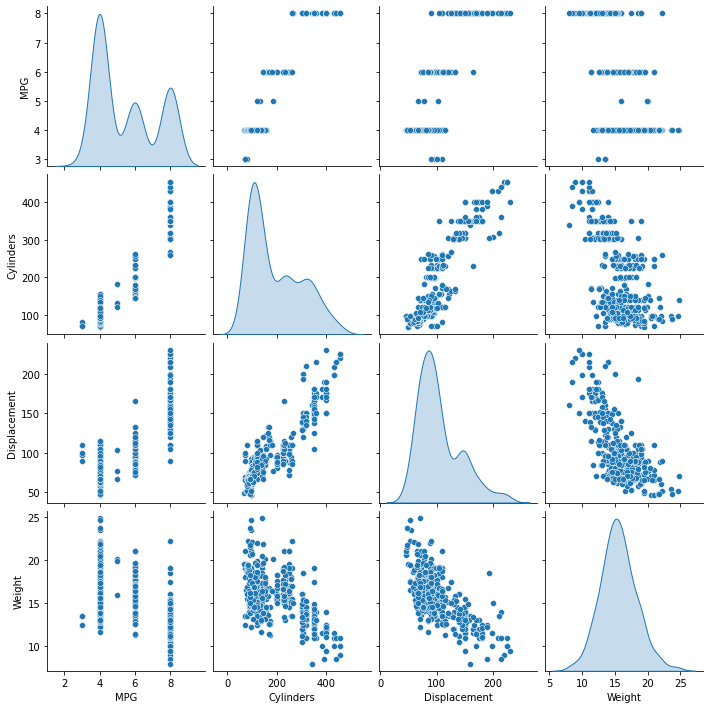

In [166]:
sns.pairplot(dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde");

In [167]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [168]:
def norm(df):
    standardized_data = pd.DataFrame()
    for col in df.columns:
        standardized_data[col] = (df[col] - df[col].mean())/ df[col].std()
    return standardized_data

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [169]:
normed_train_data.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
28.0,-1.009459,-0.784052,-1.025303,-0.379759,-0.516397,-0.715676
22.3,-0.530218,-0.442811,-0.118796,0.624102,0.843910,-0.715676
12.0,1.482595,1.447140,1.736877,-0.738281,-1.060519,-0.715676
38.0,-0.865687,-1.099044,-1.025303,-0.308055,1.660094,-0.715676
33.8,-0.942365,-0.994047,-1.001603,0.875068,1.115971,1.781239


In [170]:
normed_test_data.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
9.0,2.001298,3.516881,2.828568,0.600896,-3.562329,-0.823886
22.5,1.059231,0.183860,0.607085,0.233682,-1.279672,-0.823886
43.1,-0.798735,-1.175235,-0.876601,1.824943,-0.518786,0.308957
32.8,-0.955746,-1.045798,-0.876601,0.968110,-0.518786,1.441800
20.8,0.640534,0.022063,0.586853,-0.133532,-0.518786,-0.823886


In [264]:
# Build the model


def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=tf.keras.activations.relu, input_shape = [len(train_dataset.keys())]),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    
    model.compile(
        loss = 'mean_absolute_error',
        optimizer = tf.keras.optimizers.Adam(0.001),
        metrics = ['mean_absolute_error'])
    
    return model

model = build_model()
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 64)                448       
                                                                 
 dense_31 (Dense)            (None, 64)                4160      
                                                                 
 dense_32 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [177]:
class PrintDot(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print('')
        print('.', end='')

In [187]:
import numpy as np

In [241]:
history = model.fit(np.array(normed_train_data), np.array(train_labels),
                   epochs=1000, validation_split=0.2,
                   callbacks=[PrintDot()])

Epoch 1/1000
8/8 [==============================] - 0s 38ms/step - loss: 0.1082 - mean_absolute_error: 0.1082 - val_loss: 0.0972 - val_mean_absolute_error: 0.0972
Epoch 2/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.1226 - mean_absolute_error: 0.1226 - val_loss: 0.1063 - val_mean_absolute_error: 0.1063
Epoch 3/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.1108 - mean_absolute_error: 0.1108 - val_loss: 0.0705 - val_mean_absolute_error: 0.0705
Epoch 4/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.1182 - mean_absolute_error: 0.1182 - val_loss: 0.0486 - val_mean_absolute_error: 0.0486
Epoch 5/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1279 - mean_absolute_error: 0.1279 - val_loss: 0.1062 - val_mean_absolute_error: 0.1062
Epoch 6/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.1018 - mean_absolute_error: 0.1018 - val_loss: 0.1752 - val_mean_absolute_error: 0.1752
Epoch 7/1000
8/8 [=========

Epoch 51/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.1114 - mean_absolute_error: 0.1114 - val_loss: 0.0901 - val_mean_absolute_error: 0.0901
Epoch 52/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.1108 - mean_absolute_error: 0.1108 - val_loss: 0.1196 - val_mean_absolute_error: 0.1196
Epoch 53/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.1258 - mean_absolute_error: 0.1258 - val_loss: 0.1087 - val_mean_absolute_error: 0.1087
Epoch 54/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1091 - mean_absolute_error: 0.1091 - val_loss: 0.0665 - val_mean_absolute_error: 0.0665
Epoch 55/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.1027 - mean_absolute_error: 0.1027 - val_loss: 0.1036 - val_mean_absolute_error: 0.1036
Epoch 56/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.1265 - mean_absolute_error: 0.1265 - val_loss: 0.1127 - val_mean_absolute_error: 0.1127
Epoch 57/1000
8/8 [===

8/8 [==============================] - 0s 5ms/step - loss: 0.1098 - mean_absolute_error: 0.1098 - val_loss: 0.1015 - val_mean_absolute_error: 0.1015
Epoch 102/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.1186 - mean_absolute_error: 0.1186 - val_loss: 0.0997 - val_mean_absolute_error: 0.0997
Epoch 103/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1142 - mean_absolute_error: 0.1142 - val_loss: 0.1223 - val_mean_absolute_error: 0.1223
Epoch 104/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1090 - mean_absolute_error: 0.1090 - val_loss: 0.0847 - val_mean_absolute_error: 0.0847
Epoch 105/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.1244 - mean_absolute_error: 0.1244 - val_loss: 0.0687 - val_mean_absolute_error: 0.0687
Epoch 106/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.1006 - mean_absolute_error: 0.1006 - val_loss: 0.1100 - val_mean_absolute_error: 0.1100
Epoch 107/1000
8/8 [===========

8/8 [==============================] - 0s 6ms/step - loss: 0.1303 - mean_absolute_error: 0.1303 - val_loss: 0.1151 - val_mean_absolute_error: 0.1151
Epoch 151/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0973 - mean_absolute_error: 0.0973 - val_loss: 0.1535 - val_mean_absolute_error: 0.1535
Epoch 152/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.1193 - mean_absolute_error: 0.1193 - val_loss: 0.1000 - val_mean_absolute_error: 0.1000
Epoch 153/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1027 - mean_absolute_error: 0.1027 - val_loss: 0.1231 - val_mean_absolute_error: 0.1231
Epoch 154/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1194 - mean_absolute_error: 0.1194 - val_loss: 0.0933 - val_mean_absolute_error: 0.0933
Epoch 155/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.1287 - mean_absolute_error: 0.1287 - val_loss: 0.0689 - val_mean_absolute_error: 0.0689
Epoch 156/1000
8/8 [===========

8/8 [==============================] - 0s 5ms/step - loss: 0.1057 - mean_absolute_error: 0.1057 - val_loss: 0.0954 - val_mean_absolute_error: 0.0954
Epoch 201/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.1199 - mean_absolute_error: 0.1199 - val_loss: 0.1033 - val_mean_absolute_error: 0.1033
Epoch 202/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1007 - mean_absolute_error: 0.1007 - val_loss: 0.1315 - val_mean_absolute_error: 0.1315
Epoch 203/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1169 - mean_absolute_error: 0.1169 - val_loss: 0.1043 - val_mean_absolute_error: 0.1043
Epoch 204/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1022 - mean_absolute_error: 0.1022 - val_loss: 0.1203 - val_mean_absolute_error: 0.1203
Epoch 205/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1190 - mean_absolute_error: 0.1190 - val_loss: 0.0823 - val_mean_absolute_error: 0.0823
Epoch 206/1000
8/8 [===========

8/8 [==============================] - 0s 6ms/step - loss: 0.1049 - mean_absolute_error: 0.1049 - val_loss: 0.1515 - val_mean_absolute_error: 0.1515
Epoch 250/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1232 - mean_absolute_error: 0.1232 - val_loss: 0.0963 - val_mean_absolute_error: 0.0963
Epoch 251/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.1111 - mean_absolute_error: 0.1111 - val_loss: 0.1219 - val_mean_absolute_error: 0.1219
Epoch 252/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1146 - mean_absolute_error: 0.1146 - val_loss: 0.1052 - val_mean_absolute_error: 0.1052
Epoch 253/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - val_loss: 0.1021 - val_mean_absolute_error: 0.1021
Epoch 254/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1225 - mean_absolute_error: 0.1225 - val_loss: 0.1603 - val_mean_absolute_error: 0.1603
Epoch 255/1000
8/8 [===========

8/8 [==============================] - 0s 6ms/step - loss: 0.0891 - mean_absolute_error: 0.0891 - val_loss: 0.1379 - val_mean_absolute_error: 0.1379
Epoch 300/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.1107 - mean_absolute_error: 0.1107 - val_loss: 0.1049 - val_mean_absolute_error: 0.1049
Epoch 301/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.1182 - mean_absolute_error: 0.1182 - val_loss: 0.0974 - val_mean_absolute_error: 0.0974
Epoch 302/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.1072 - mean_absolute_error: 0.1072 - val_loss: 0.1455 - val_mean_absolute_error: 0.1455
Epoch 303/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.1034 - mean_absolute_error: 0.1034 - val_loss: 0.0784 - val_mean_absolute_error: 0.0784
Epoch 304/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.1041 - mean_absolute_error: 0.1041 - val_loss: 0.1283 - val_mean_absolute_error: 0.1283
Epoch 305/1000
8/8 [===========

8/8 [==============================] - 0s 5ms/step - loss: 0.1185 - mean_absolute_error: 0.1185 - val_loss: 0.1338 - val_mean_absolute_error: 0.1338
Epoch 349/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.1072 - mean_absolute_error: 0.1072 - val_loss: 0.0975 - val_mean_absolute_error: 0.0975
Epoch 350/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0985 - mean_absolute_error: 0.0985 - val_loss: 0.1445 - val_mean_absolute_error: 0.1445
Epoch 351/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.1105 - mean_absolute_error: 0.1105 - val_loss: 0.1225 - val_mean_absolute_error: 0.1225
Epoch 352/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0924 - mean_absolute_error: 0.0924 - val_loss: 0.0911 - val_mean_absolute_error: 0.0911
Epoch 353/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - val_loss: 0.0974 - val_mean_absolute_error: 0.0974
Epoch 354/1000
8/8 [===========

8/8 [==============================] - 0s 6ms/step - loss: 0.0985 - mean_absolute_error: 0.0985 - val_loss: 0.0896 - val_mean_absolute_error: 0.0896
Epoch 399/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1139 - mean_absolute_error: 0.1139 - val_loss: 0.1307 - val_mean_absolute_error: 0.1307
Epoch 400/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1035 - mean_absolute_error: 0.1035 - val_loss: 0.0998 - val_mean_absolute_error: 0.0998
Epoch 401/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1026 - mean_absolute_error: 0.1026 - val_loss: 0.0959 - val_mean_absolute_error: 0.0959
Epoch 402/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1069 - mean_absolute_error: 0.1069 - val_loss: 0.1703 - val_mean_absolute_error: 0.1703
Epoch 403/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1096 - mean_absolute_error: 0.1096 - val_loss: 0.1244 - val_mean_absolute_error: 0.1244
Epoch 404/1000
8/8 [===========

8/8 [==============================] - 0s 6ms/step - loss: 0.1112 - mean_absolute_error: 0.1112 - val_loss: 0.1078 - val_mean_absolute_error: 0.1078
Epoch 448/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1045 - mean_absolute_error: 0.1045 - val_loss: 0.0962 - val_mean_absolute_error: 0.0962
Epoch 449/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1109 - mean_absolute_error: 0.1109 - val_loss: 0.1324 - val_mean_absolute_error: 0.1324
Epoch 450/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0882 - mean_absolute_error: 0.0882 - val_loss: 0.1220 - val_mean_absolute_error: 0.1220
Epoch 451/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.1018 - mean_absolute_error: 0.1018 - val_loss: 0.1527 - val_mean_absolute_error: 0.1527
Epoch 452/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.1160 - mean_absolute_error: 0.1160 - val_loss: 0.1172 - val_mean_absolute_error: 0.1172
Epoch 453/1000
8/8 [===========

8/8 [==============================] - 0s 5ms/step - loss: 0.0904 - mean_absolute_error: 0.0904 - val_loss: 0.1669 - val_mean_absolute_error: 0.1669
Epoch 498/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1039 - mean_absolute_error: 0.1039 - val_loss: 0.1369 - val_mean_absolute_error: 0.1369
Epoch 499/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1158 - mean_absolute_error: 0.1158 - val_loss: 0.1047 - val_mean_absolute_error: 0.1047
Epoch 500/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0926 - mean_absolute_error: 0.0926 - val_loss: 0.1293 - val_mean_absolute_error: 0.1293
Epoch 501/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0883 - mean_absolute_error: 0.0883 - val_loss: 0.1081 - val_mean_absolute_error: 0.1081
Epoch 502/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1146 - mean_absolute_error: 0.1146 - val_loss: 0.1480 - val_mean_absolute_error: 0.1480
Epoch 503/1000
8/8 [===========

8/8 [==============================] - 0s 5ms/step - loss: 0.1022 - mean_absolute_error: 0.1022 - val_loss: 0.1309 - val_mean_absolute_error: 0.1309
Epoch 547/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - val_loss: 0.1035 - val_mean_absolute_error: 0.1035
Epoch 548/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0940 - mean_absolute_error: 0.0940 - val_loss: 0.1204 - val_mean_absolute_error: 0.1204
Epoch 549/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1046 - mean_absolute_error: 0.1046 - val_loss: 0.1254 - val_mean_absolute_error: 0.1254
Epoch 550/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0969 - mean_absolute_error: 0.0969 - val_loss: 0.1361 - val_mean_absolute_error: 0.1361
Epoch 551/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0969 - mean_absolute_error: 0.0969 - val_loss: 0.1339 - val_mean_absolute_error: 0.1339
Epoch 552/1000
8/8 [===========

8/8 [==============================] - 0s 5ms/step - loss: 0.1009 - mean_absolute_error: 0.1009 - val_loss: 0.1023 - val_mean_absolute_error: 0.1023
Epoch 597/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - val_loss: 0.1562 - val_mean_absolute_error: 0.1562
Epoch 598/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1111 - mean_absolute_error: 0.1111 - val_loss: 0.1540 - val_mean_absolute_error: 0.1540
Epoch 599/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.1058 - mean_absolute_error: 0.1058 - val_loss: 0.1236 - val_mean_absolute_error: 0.1236
Epoch 600/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1051 - mean_absolute_error: 0.1051 - val_loss: 0.1186 - val_mean_absolute_error: 0.1186
Epoch 601/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - val_loss: 0.1862 - val_mean_absolute_error: 0.1862
Epoch 602/1000
8/8 [===========

8/8 [==============================] - 0s 5ms/step - loss: 0.0954 - mean_absolute_error: 0.0954 - val_loss: 0.1261 - val_mean_absolute_error: 0.1261
Epoch 646/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0891 - mean_absolute_error: 0.0891 - val_loss: 0.1041 - val_mean_absolute_error: 0.1041
Epoch 647/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - val_loss: 0.1181 - val_mean_absolute_error: 0.1181
Epoch 648/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1028 - mean_absolute_error: 0.1028 - val_loss: 0.1123 - val_mean_absolute_error: 0.1123
Epoch 649/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.1032 - mean_absolute_error: 0.1032 - val_loss: 0.1312 - val_mean_absolute_error: 0.1312
Epoch 650/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1073 - mean_absolute_error: 0.1073 - val_loss: 0.1200 - val_mean_absolute_error: 0.1200
Epoch 651/1000
8/8 [===========

8/8 [==============================] - 0s 6ms/step - loss: 0.0984 - mean_absolute_error: 0.0984 - val_loss: 0.1327 - val_mean_absolute_error: 0.1327
Epoch 696/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0952 - mean_absolute_error: 0.0952 - val_loss: 0.1315 - val_mean_absolute_error: 0.1315
Epoch 697/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1015 - mean_absolute_error: 0.1015 - val_loss: 0.1609 - val_mean_absolute_error: 0.1609
Epoch 698/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0966 - mean_absolute_error: 0.0966 - val_loss: 0.1579 - val_mean_absolute_error: 0.1579
Epoch 699/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0939 - mean_absolute_error: 0.0939 - val_loss: 0.1269 - val_mean_absolute_error: 0.1269
Epoch 700/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0940 - mean_absolute_error: 0.0940 - val_loss: 0.1107 - val_mean_absolute_error: 0.1107
Epoch 701/1000
8/8 [===========

8/8 [==============================] - 0s 6ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - val_loss: 0.1102 - val_mean_absolute_error: 0.1102
Epoch 745/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0957 - mean_absolute_error: 0.0957 - val_loss: 0.1248 - val_mean_absolute_error: 0.1248
Epoch 746/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - val_loss: 0.1689 - val_mean_absolute_error: 0.1689
Epoch 747/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0932 - mean_absolute_error: 0.0932 - val_loss: 0.1474 - val_mean_absolute_error: 0.1474
Epoch 748/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0870 - mean_absolute_error: 0.0870 - val_loss: 0.1148 - val_mean_absolute_error: 0.1148
Epoch 749/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1067 - mean_absolute_error: 0.1067 - val_loss: 0.1274 - val_mean_absolute_error: 0.1274
Epoch 750/1000
8/8 [===========

8/8 [==============================] - 0s 6ms/step - loss: 0.0949 - mean_absolute_error: 0.0949 - val_loss: 0.1842 - val_mean_absolute_error: 0.1842
Epoch 795/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0937 - mean_absolute_error: 0.0937 - val_loss: 0.1362 - val_mean_absolute_error: 0.1362
Epoch 796/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0998 - mean_absolute_error: 0.0998 - val_loss: 0.1834 - val_mean_absolute_error: 0.1834
Epoch 797/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0921 - mean_absolute_error: 0.0921 - val_loss: 0.1435 - val_mean_absolute_error: 0.1435
Epoch 798/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0852 - mean_absolute_error: 0.0852 - val_loss: 0.1291 - val_mean_absolute_error: 0.1291
Epoch 799/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0852 - mean_absolute_error: 0.0852 - val_loss: 0.1832 - val_mean_absolute_error: 0.1832
Epoch 800/1000
8/8 [===========

8/8 [==============================] - 0s 6ms/step - loss: 0.0870 - mean_absolute_error: 0.0870 - val_loss: 0.1576 - val_mean_absolute_error: 0.1576
Epoch 844/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.1000 - mean_absolute_error: 0.1000 - val_loss: 0.1330 - val_mean_absolute_error: 0.1330
Epoch 845/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0853 - mean_absolute_error: 0.0853 - val_loss: 0.1538 - val_mean_absolute_error: 0.1538
Epoch 846/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1003 - mean_absolute_error: 0.1003 - val_loss: 0.1515 - val_mean_absolute_error: 0.1515
Epoch 847/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0861 - mean_absolute_error: 0.0861 - val_loss: 0.1155 - val_mean_absolute_error: 0.1155
Epoch 848/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - val_loss: 0.1772 - val_mean_absolute_error: 0.1772
Epoch 849/1000
8/8 [===========

8/8 [==============================] - 0s 6ms/step - loss: 0.1054 - mean_absolute_error: 0.1054 - val_loss: 0.1723 - val_mean_absolute_error: 0.1723
Epoch 894/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0957 - mean_absolute_error: 0.0957 - val_loss: 0.1206 - val_mean_absolute_error: 0.1206
Epoch 895/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - val_loss: 0.1390 - val_mean_absolute_error: 0.1390
Epoch 896/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - val_loss: 0.1160 - val_mean_absolute_error: 0.1160
Epoch 897/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0921 - mean_absolute_error: 0.0921 - val_loss: 0.1763 - val_mean_absolute_error: 0.1763
Epoch 898/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0902 - mean_absolute_error: 0.0902 - val_loss: 0.1641 - val_mean_absolute_error: 0.1641
Epoch 899/1000
8/8 [===========

8/8 [==============================] - 0s 5ms/step - loss: 0.1025 - mean_absolute_error: 0.1025 - val_loss: 0.1227 - val_mean_absolute_error: 0.1227
Epoch 943/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - val_loss: 0.1271 - val_mean_absolute_error: 0.1271
Epoch 944/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0968 - mean_absolute_error: 0.0968 - val_loss: 0.1418 - val_mean_absolute_error: 0.1418
Epoch 945/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - val_loss: 0.1551 - val_mean_absolute_error: 0.1551
Epoch 946/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0924 - mean_absolute_error: 0.0924 - val_loss: 0.1332 - val_mean_absolute_error: 0.1332
Epoch 947/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0947 - mean_absolute_error: 0.0947 - val_loss: 0.1227 - val_mean_absolute_error: 0.1227
Epoch 948/1000
8/8 [===========

8/8 [==============================] - 0s 6ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - val_loss: 0.1320 - val_mean_absolute_error: 0.1320
Epoch 993/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0920 - mean_absolute_error: 0.0920 - val_loss: 0.1588 - val_mean_absolute_error: 0.1588
Epoch 994/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - val_loss: 0.1399 - val_mean_absolute_error: 0.1399
Epoch 995/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0920 - mean_absolute_error: 0.0920 - val_loss: 0.1430 - val_mean_absolute_error: 0.1430
Epoch 996/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0940 - mean_absolute_error: 0.0940 - val_loss: 0.1561 - val_mean_absolute_error: 0.1561
Epoch 997/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - val_loss: 0.1728 - val_mean_absolute_error: 0.1728
Epoch 998/1000
8/8 [===========

In [205]:
h = tf.convert_to_tensor(
    np.array(normed_train_data), dtype=None
)

In [217]:
np.array(normed_train_data)

array([[-1.0094591 , -0.78405236, -1.0253028 , -0.3797592 , -0.51639657,
        -0.71567631],
       [-0.53021786, -0.4428111 , -0.11879578,  0.62410217,  0.84390983,
        -0.71567631],
       [ 1.48259536,  1.44714046,  1.73687741, -0.73828112, -1.06051913,
        -0.71567631],
       ...,
       [-0.83693225, -0.31156447, -0.71009905, -0.02123729, -0.51639657,
         1.78123881],
       [-1.07655287, -1.15154294, -1.16986993,  1.23358943, -0.51639657,
         1.78123881],
       [-0.84651708, -0.49530976, -0.62359577, -0.02123729,  0.02772599,
         0.53278125]])

In [228]:
c= tf.expand_dims(h, axis=-1)
c

<tf.Tensor: shape=(314, 6, 1), dtype=float64, numpy=
array([[[-1.0094591 ],
        [-0.78405236],
        [-1.0253028 ],
        [-0.3797592 ],
        [-0.51639657],
        [-0.71567631]],

       [[-0.53021786],
        [-0.4428111 ],
        [-0.11879578],
        [ 0.62410217],
        [ 0.84390983],
        [-0.71567631]],

       [[ 1.48259536],
        [ 1.44714046],
        [ 1.73687741],
        [-0.73828112],
        [-1.06051913],
        [-0.71567631]],

       ...,

       [[-0.83693225],
        [-0.31156447],
        [-0.71009905],
        [-0.02123729],
        [-0.51639657],
        [ 1.78123881]],

       [[-1.07655287],
        [-1.15154294],
        [-1.16986993],
        [ 1.23358943],
        [-0.51639657],
        [ 1.78123881]],

       [[-0.84651708],
        [-0.49530976],
        [-0.62359577],
        [-0.02123729],
        [ 0.02772599],
        [ 0.53278125]]])>

KeyError: 'val_mean_absolute_error'

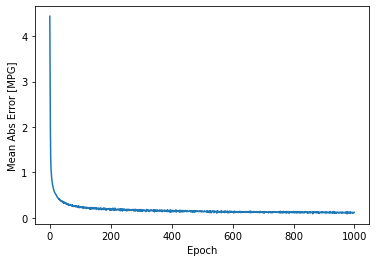

In [229]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  #plt.ylim([0,5])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  #plt.ylim([0,20])
  plt.legend()
  plt.show()
plot_history(history)

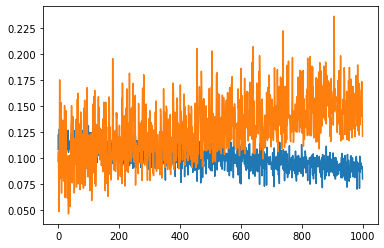

In [242]:
plt.plot(history.epoch, history.history['mean_absolute_error'])
plt.plot(history.epoch, history.history['val_mean_absolute_error'])

In [284]:
# Build the model


def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(200, activation=tf.keras.activations.relu, input_shape = [len(train_dataset.keys())]),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    
    model.compile(
        loss = 'mean_absolute_error',
        optimizer = tf.keras.optimizers.Adam(0.001),
        metrics = ['mean_squared_error'])
    
    return model

model = build_model()

model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)


history = model.fit(np.array(normed_train_data), np.array(train_labels), epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])



....................................................................................................
.....................

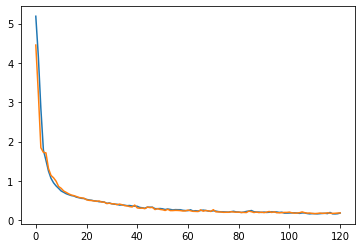

In [285]:
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])

In [286]:
loss, mae = model.evaluate(np.array(normed_test_data), np.array(test_labels), verbose=1)

1/1 [==============================] - 0s 24ms/step - loss: 0.7287 - mean_squared_error: 1.0122


In [268]:
test_predictions = model.predict(normed_test_data).flatten()

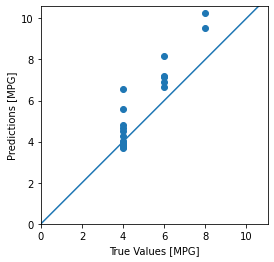

In [287]:
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

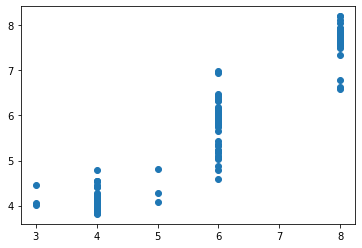

In [288]:
plt.scatter(train_labels, model.predict(normed_train_data).flatten())

In [272]:
model.predict(normed_train_data)

array([[4.1309495],
       [3.9572902],
       [8.051193 ],
       [4.002288 ],
       [3.9915144],
       [5.8851123],
       [4.004162 ],
       [4.1660924],
       [5.482242 ],
       [4.0995812],
       [4.0074406],
       [8.030196 ],
       [4.134705 ],
       [8.0953665],
       [8.214122 ],
       [3.9899704],
       [4.2055497],
       [8.0121355],
       [4.0414553],
       [3.9968448],
       [8.009957 ],
       [6.0220685],
       [3.8863885],
       [4.9437623],
       [3.9946702],
       [8.072407 ],
       [4.00605  ],
       [3.984246 ],
       [5.9292383],
       [8.04535  ],
       [4.6445694],
       [4.082808 ],
       [3.963485 ],
       [4.0428457],
       [6.2453246],
       [4.1574845],
       [4.0163975],
       [7.9791546],
       [8.040477 ],
       [8.03377  ],
       [7.996323 ],
       [3.9984882],
       [4.036185 ],
       [7.9592986],
       [4.0299916],
       [7.9754586],
       [3.9412978],
       [8.01938  ],
       [8.015794 ],
       [5.98594  ],
